## Data Loading & Setup

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import torch

In [5]:
# Check for CUDA support
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [6]:
import certifi
print(certifi.where())

/Users/in22417145/PycharmProjects/data-science-projects/dsvenv/lib/python3.9/site-packages/certifi/cacert.pem


In [7]:
# Load stock data
import requests
import os

# Set proxy environment variables
# os.environ['HTTP_PROXY'] = 'http://uk5.proxy.tesco.org:80'
# os.environ['HTTPS_PROXY'] = 'http://uk5.proxy.tesco.org:80'
# os.environ['NO_PROXY'] = 'localhost,127.0.0.1,.tesco.org'


symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2024-01-01'
data = yf.download(symbol, start=start_date, end=end_date)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


In [8]:

# import os

# # Clear proxy settings
# for var in ['HTTP_PROXY', 'HTTPS_PROXY', 'http_proxy', 'https_proxy', 'NO_PROXY', 'no_proxy']:
#     os.environ.pop(var, None)


## Data Cleaning

Cleaning ensures high-quality, consistent data, which improves model performance and insights.
- Handling missing values
- Fixing incorrect data types
- Removing duplicates
- Resetting index

In [9]:
# Reset index to bring 'Date' into a column
data.reset_index(inplace=True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
1,2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
4,2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


In [10]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())
data.head()

Missing values in each column:
Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
1,2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
4,2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


In [11]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
1,2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
4,2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


In [12]:
# Confirm cleanup
print("\nShape after cleaning:", data.shape)
print("\nSample cleaned data:")
print(data.head())


Shape after cleaning: (2264, 6)

Sample cleaned data:
Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2015-01-02  24.288582  24.757336  23.848707  24.746228  212818400
1      2015-01-05  23.604336  24.137516  23.417723  24.057539  257142000
2      2015-01-06  23.606552  23.866477  23.244433  23.668756  263188400
3      2015-01-07  23.937567  24.037537  23.704300  23.815379  160423600
4      2015-01-08  24.857307  24.915069  24.148621  24.266367  237458000


In [13]:
# Check data types
print("\nData types:")
print(data.dtypes)


Data types:
Price   Ticker
Date              datetime64[ns]
Close   AAPL             float64
High    AAPL             float64
Low     AAPL             float64
Open    AAPL             float64
Volume  AAPL               int64
dtype: object


## Exploratory Data Analysis (EDA):

EDA is crucial for understanding the underlying patterns, trends, and anomalies in your dataset. It helps in:
- Identifying trends and seasonality in stock prices
- Detecting outliers or anomalies
- Understanding the distribution of data
- Informing feature engineering and model selection


In [14]:
# Import Necessary Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import numpy as np


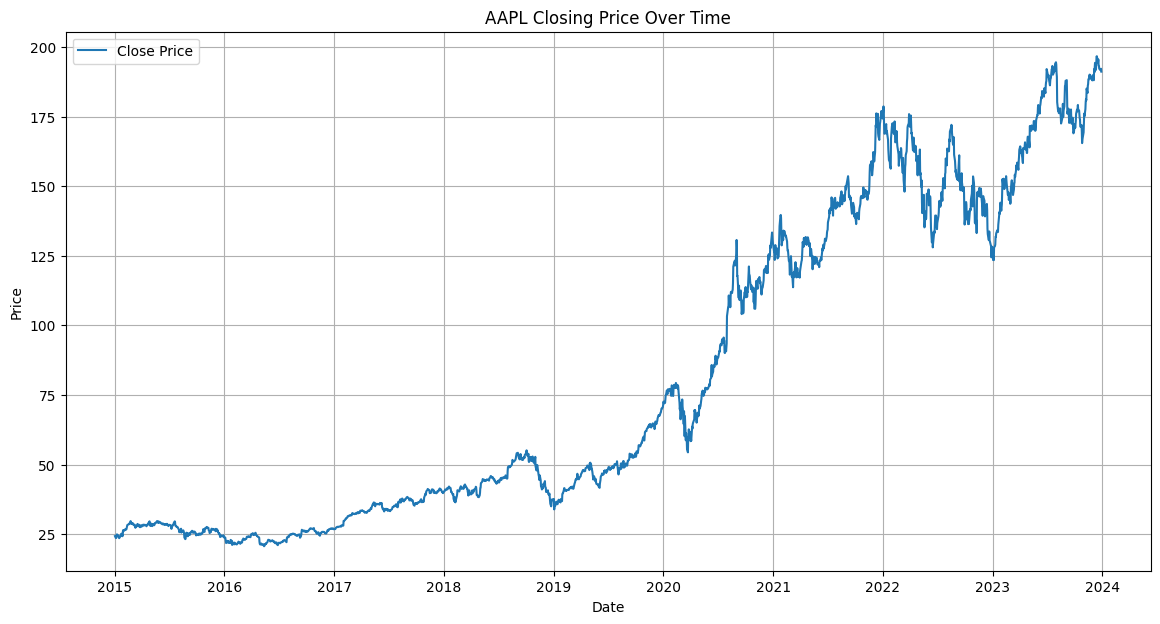

In [15]:
# Visualize Closing Price Over Time - Plotting the closing price helps identify overall trends.

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title(f'{symbol} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


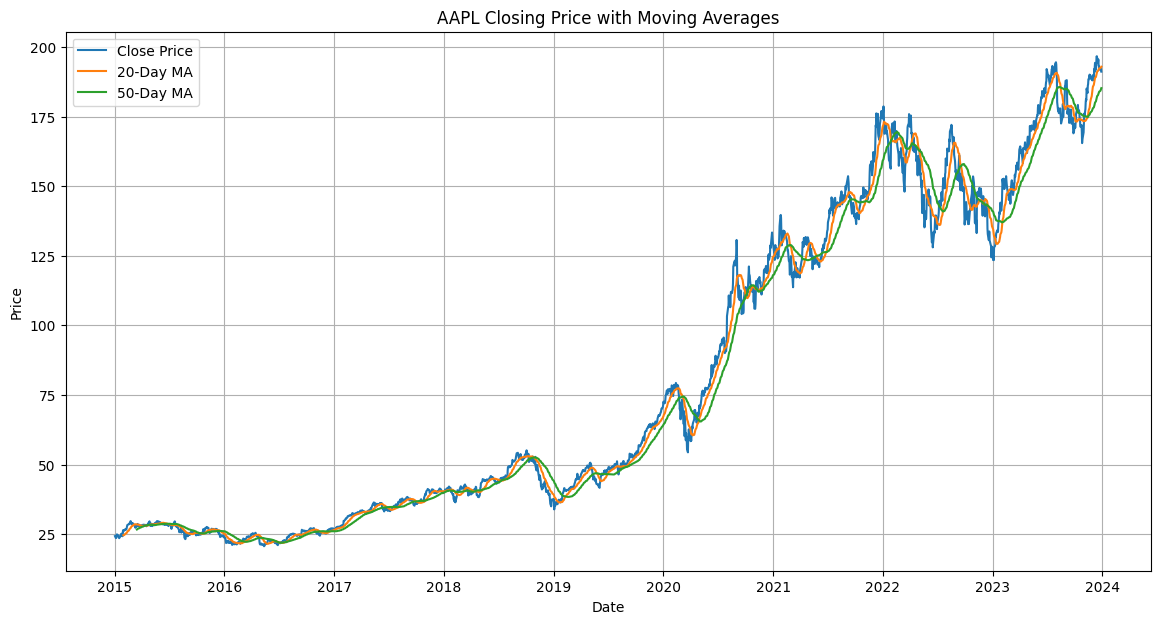

In [16]:
# Calculate and Plot Moving Averages - Moving averages smooth out short-term fluctuations and highlight longer-term trends.

data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA20'], label='20-Day MA')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.title(f'{symbol} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


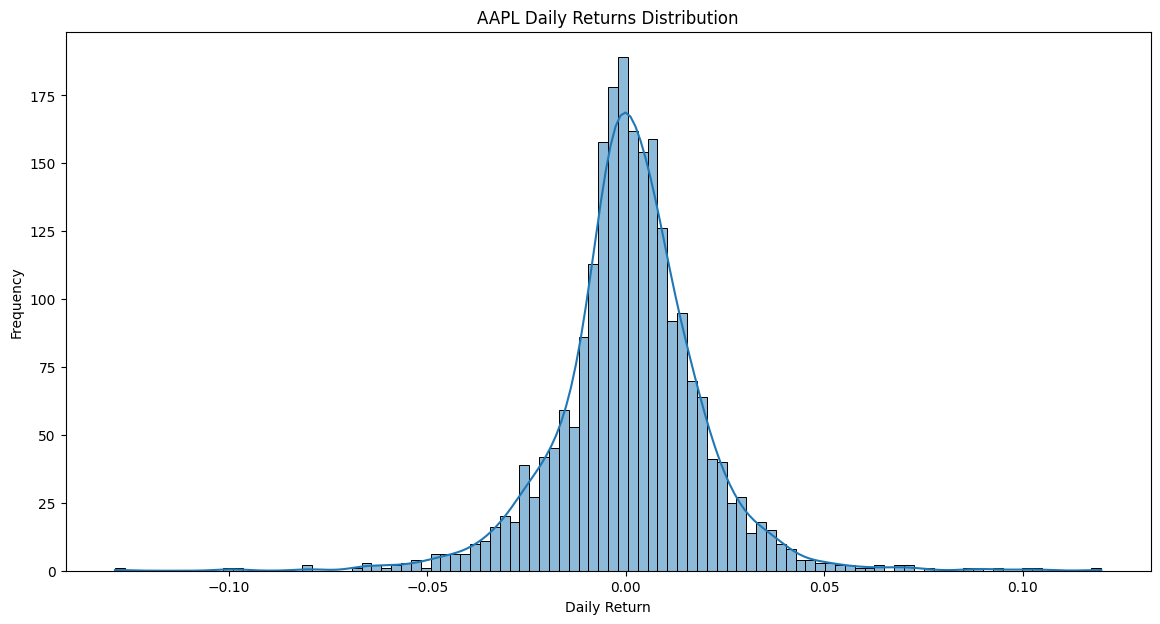

In [17]:
# Daily Returns Distribution - Analyzing daily returns helps understand the volatility of the stock.

data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True)
plt.title(f'{symbol} Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


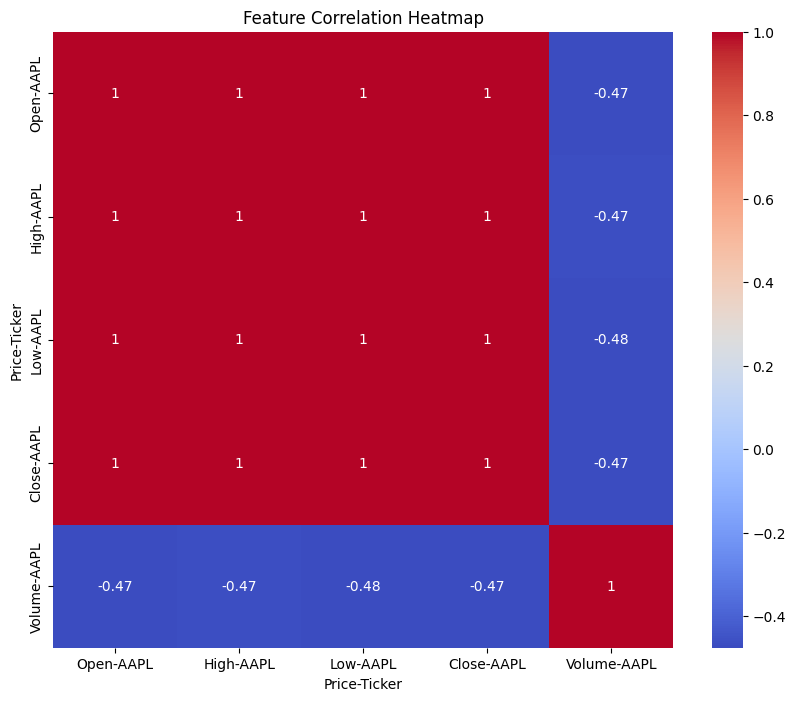

In [18]:
# Correlation Heatmap - If analyzing multiple stocks, a correlation heatmap reveals relationships between them.

# Assuming 'data' contains multiple stocks with 'Close' prices
# For single stock, this step can be skipped or adapted accordingly

# Example for multiple stocks:
# stocks = ['AAPL', 'MSFT', 'GOOG']
# data = yf.download(stocks, start=start_date, end=end_date)['Close']
# data = data.pct_change().dropna()

# For demonstration, using the same stock's different features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = data[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (Date, )          2264 non-null   datetime64[ns]
 1   (Close, AAPL)     2264 non-null   float64       
 2   (High, AAPL)      2264 non-null   float64       
 3   (Low, AAPL)       2264 non-null   float64       
 4   (Open, AAPL)      2264 non-null   float64       
 5   (Volume, AAPL)    2264 non-null   int64         
 6   (MA20, )          2245 non-null   float64       
 7   (MA50, )          2215 non-null   float64       
 8   (Daily Return, )  2263 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 159.3 KB


In [20]:
# Candlestick Chart - Candlestick charts provide a detailed view of price movements.

# Flatten MultiIndex columns
data.columns = data.columns.get_level_values(0)



fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(title=f'{symbol} Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()


## Feature Engineering:

Feature engineering transforms raw data into informative inputs that enhance model performance. In stock price prediction, this involves creating indicators that capture market trends, momentum, and volatility.

*   **Daily Return**: Percentage change between consecutive closing prices.
*   **Moving Averages (MA)**: Smoothed price trends over 20 and 50 days.
*   **Exponential Moving Average (EMA)**: Gives more weight to recent prices.
*   **Relative Strength Index (RSI)**: Measures speed and change of price movements.
*   **Moving Average Convergence Divergence (MACD)**: Captures momentum by comparing short and long-term EMAs.
*   **Bollinger Bands**: Indicates volatility by placing bands above and below a moving average.
*   **Lag Features**: Previous day's closing price.
*   **Rolling Statistics**: Rolling mean and standard deviation over a 7-day window.

In [21]:
# 1. Daily Return
data['Daily_Return'] = data['Close'].pct_change()

In [22]:
# 2. Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

In [23]:
# 3. Exponential Moving Average
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [24]:
# 4. Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [25]:
# 5. MACD
ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [26]:
# 6. Bollinger Bands
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_Std'] = data['Close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Middle'] + (2 * data['BB_Std'])
data['BB_Lower'] = data['BB_Middle'] - (2 * data['BB_Std'])

In [27]:
# 7. Lag Feature
data['Lag1'] = data['Close'].shift(1)

In [28]:
# 8. Rolling Statistics
data['Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Rolling_Std_7'] = data['Close'].rolling(window=7).std()

In [29]:
# Drop rows with NaN values resulting from calculations
data.dropna(inplace=True)

### Visualizing Engineered Features - Visualizations help in understanding the behavior of engineered features.

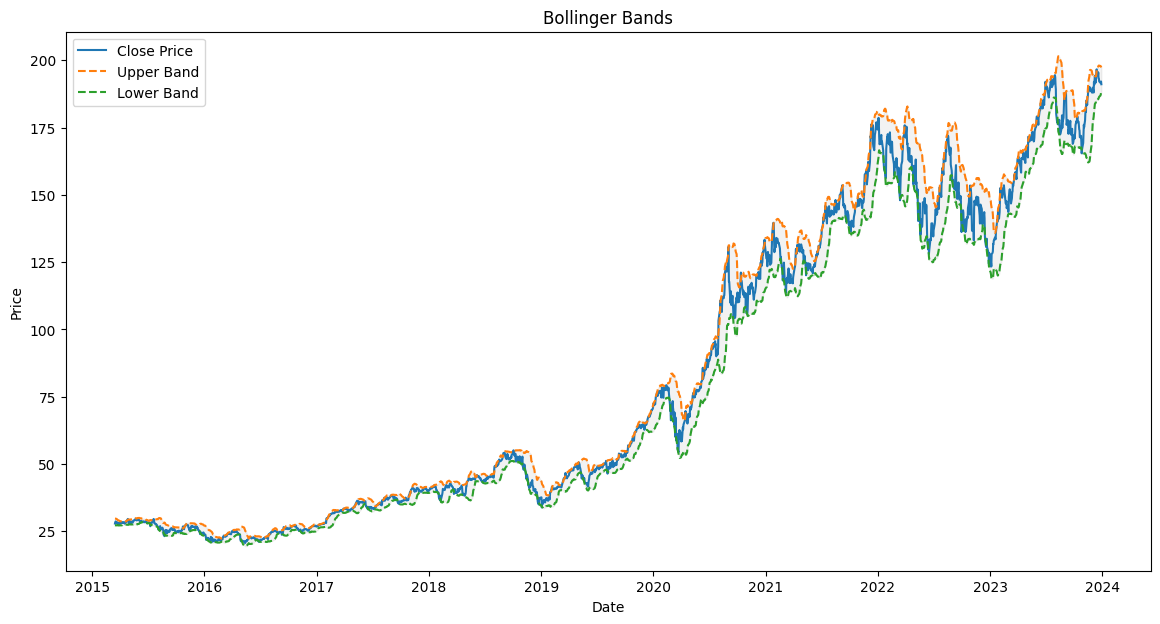

In [30]:
# Bollinger Bands

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['BB_Upper'], label='Upper Band', linestyle='--')
plt.plot(data['Date'], data['BB_Lower'], label='Lower Band', linestyle='--')
plt.fill_between(data['Date'], data['BB_Lower'], data['BB_Upper'], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


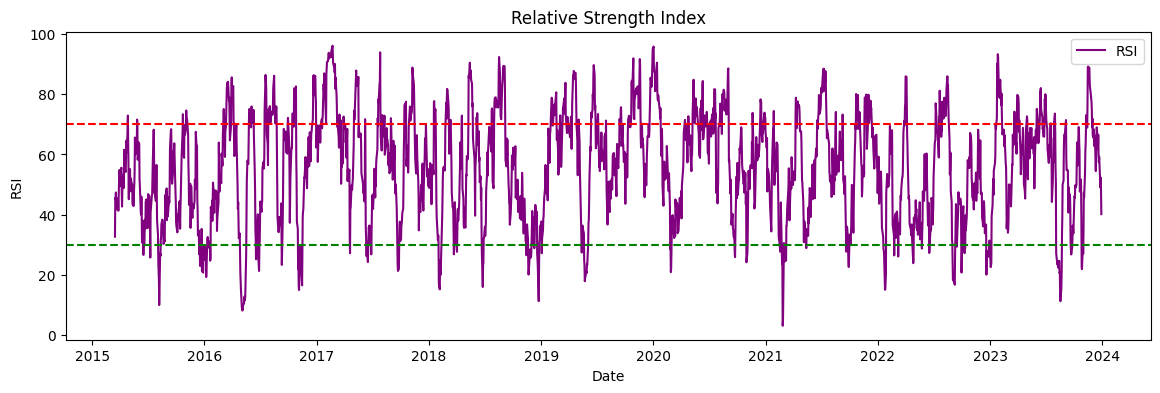

In [31]:
# RSI

plt.figure(figsize=(14, 4))
plt.plot(data['Date'], data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


### Insights:

- Daily Return: Highlights the stock's volatility.
- Moving Averages: Identify trend directions.
- RSI: Signals overbought or oversold conditions.
- MACD: Detects momentum changes.
- Bollinger Bands: Indicate price volatility.
- Lag Features: Provide temporal context.
- Rolling Statistics: Capture short-term trends and volatility.

## Model Building with PyTorch (LSTM)

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) capable of learning long-term dependencies, making them suitable for time series prediction tasks like stock price forecasting. LSTMs can capture patterns over time, which is essential for modeling the sequential nature of stock prices.

In [32]:
# 1. Data Preparation
# Before feeding data into the LSTM model, we need to:
# Normalize the data: LSTMs are sensitive to the scale of the data. We'll use MinMaxScaler to scale the features between 0 and 1.
# Create sequences: LSTMs require input in the form of sequences. We'll create sequences of a fixed length (e.g., 60 time steps) to predict the 
# next value.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'data' is your DataFrame with a 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM input: (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [33]:
# 2. Train-Test Split - We'll split the data into training and testing sets to evaluate the model's performance on unseen data.

train_size = int(len(X) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]


In [34]:
# 3. Convert to PyTorch Tensors - PyTorch models require input data in the form of tensors.

import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [35]:
# 4. Define the LSTM Model - We'll define an LSTM model using PyTorch's nn.Module. The model consists of an LSTM layer followed by a fully 
# connected (linear) layer.

import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out


In [36]:
# 5. Initialize the Model, Define Loss Function and Optimizer - We'll use Mean Squared Error (MSE) as the loss function and the Adam optimizer.

model = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [37]:
# 6. Train the Model - We'll train the model for a specified number of epochs, updating the model's parameters to minimize the loss.

num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs.view(-1), y_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.0560
Epoch [2/100], Loss: 0.0071
Epoch [3/100], Loss: 0.0009
Epoch [4/100], Loss: 0.0005
Epoch [5/100], Loss: 0.0007
Epoch [6/100], Loss: 0.0004
Epoch [7/100], Loss: 0.0004
Epoch [8/100], Loss: 0.0003
Epoch [9/100], Loss: 0.0004
Epoch [10/100], Loss: 0.0002
Epoch [11/100], Loss: 0.0002
Epoch [12/100], Loss: 0.0005
Epoch [13/100], Loss: 0.0004
Epoch [14/100], Loss: 0.0004
Epoch [15/100], Loss: 0.0003
Epoch [16/100], Loss: 0.0005
Epoch [17/100], Loss: 0.0003
Epoch [18/100], Loss: 0.0003
Epoch [19/100], Loss: 0.0004
Epoch [20/100], Loss: 0.0003
Epoch [21/100], Loss: 0.0003
Epoch [22/100], Loss: 0.0002
Epoch [23/100], Loss: 0.0004
Epoch [24/100], Loss: 0.0004
Epoch [25/100], Loss: 0.0002
Epoch [26/100], Loss: 0.0004
Epoch [27/100], Loss: 0.0003
Epoch [28/100], Loss: 0.0003
Epoch [29/100], Loss: 0.0003
Epoch [30/100], Loss: 0.0003
Epoch [31/100], Loss: 0.0004
Epoch [32/100], Loss: 0.0004
Epoch [33/100], Loss: 0.0002
Epoch [34/100], Loss: 0.0002
Epoch [35/100], Loss: 0

In [38]:
# 7. Evaluate the Model - After training, we'll evaluate the model's performance on the test set.

model.eval()
with torch.no_grad():
    predictions = []
    actuals = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = model(X_batch)
        predictions.extend(outputs.view(-1).cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())

# Inverse transform the predictions and actuals
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))


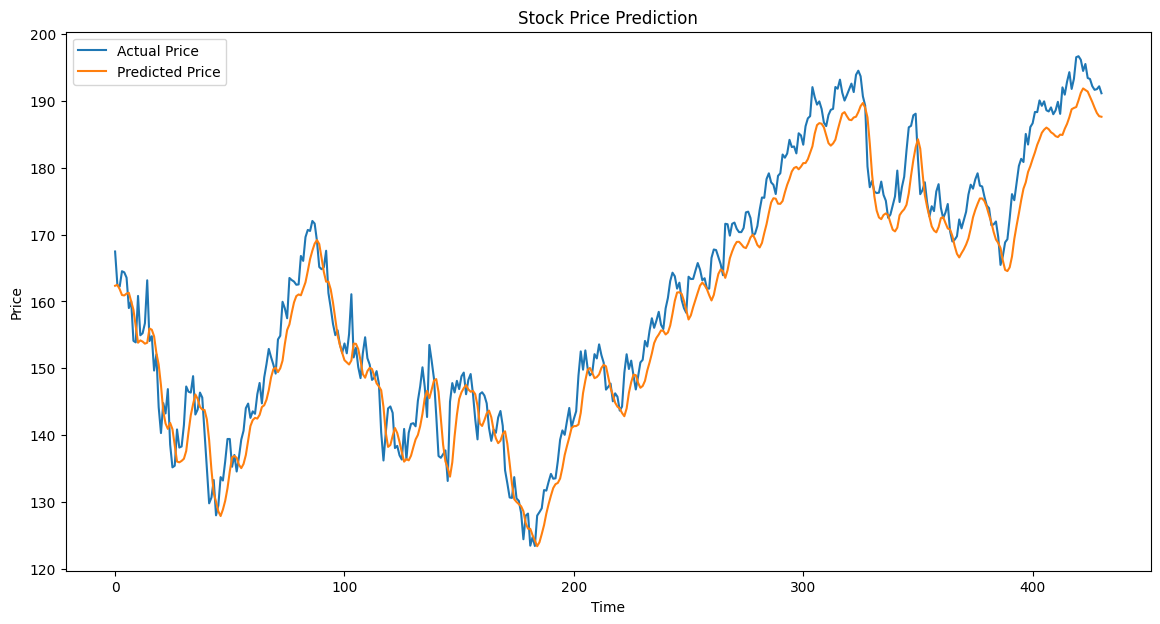

In [39]:
# 8. Visualize the Predictions - We'll plot the actual vs. predicted stock prices to visualize the model's performance

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(actuals, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


## Hyperparamater Tuning

Hyperparameters are crucial in defining the behavior and performance of machine learning models. Proper tuning can significantly enhance model accuracy and generalization. For LSTM models in stock price prediction, key hyperparameters include:
- Learning Rate
- Number of LSTM Layers
- Hidden Layer Size
- Dropout Rate
- Batch Size
- Sequence Length

### Tools for Hyperparameter Tuning

*   **Grid Search**: Exhaustively searches through a specified subset of hyperparameters.
*   **Random Search**: Samples hyperparameters randomly from a specified distribution.
*   **Bayesian Optimization**: Models the performance of the model as a function of the hyperparameters and chooses the next hyperparameters to evaluate based on past results.
*   **Optuna**: An automatic hyperparameter optimization software framework, particularly designed for machine learning.
*   **Ray Tune**: A scalable hyperparameter tuning library, integrates seamlessly with PyTorch.[](https://www.restack.io/p/hyperparameter-tuning-answer-lstm-tuning-strategies-pytorch-cat-ai?utm_source=chatgpt.com)

In [40]:
# Hyperparameter Tuning with Optuna - Optuna is an efficient and user-friendly hyperparameter optimization framework.

import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor are predefined

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

def objective(trial):
    # Hyperparameters to tune
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # Prepare data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = LSTMModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(10):  # Number of epochs can be adjusted
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.view(-1), y_batch)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs.view(-1), y_batch)
            val_losses.append(loss.item())

    return sum(val_losses) / len(val_losses)


In [41]:
# Run the Optimization

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-05-16 12:24:25,951] A new study created in memory with name: no-name-693dd09e-08df-4a3c-8fcc-53935ec4ebfc
/var/folders/h8/7mdp3b1d7459pndz78blr7380000gq/T/ipykernel_27498/375445331.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/Users/in22417145/PycharmProjects/data-science-projects/dsvenv/lib/python3.9/site-packages/torch/nn/modules/rnn.py:82: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10897502363091632 and num_layers=1

[I 2025-05-16 12:24:30,704] Trial 0 finished with value: 0.0021630231058225036 and parameters: {'hidden_size': 87, 'num_layers': 1, 'dropout': 0.10897502363091632, 'learning_rate': 0.0008172273214596846, 'batch_size': 128}. Best is trial 0 with value: 0.0021630231058225036.
[I 2025-05-16 12

Best trial:
  Value: 0.00034250707955964444
  Params: 
    hidden_size: 98
    num_layers: 1
    dropout: 0.00123066933376198
    learning_rate: 0.00856318917820609
    batch_size: 32


In [42]:
### Visualizing the Optimization Process - Optuna provides visualization tools to analyze the optimization process

optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)


With the best hyperparameters identified, you can retrain your model on the combined training and validation datasets and proceed to evaluate its performance on the test set.



## Model Evaluation and Insights

Evaluating your model is crucial to understand its predictive performance, identify areas of improvement, and ensure it generalizes well to unseen data.

*   ### Evaluation Metrics
    For regression tasks like stock price prediction, common evaluation metrics include:
    *   **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
    *   **Root Mean Squared Error (RMSE)**: Square root of MSE, providing error in the same units as the target variable.
    *   **Mean Absolute Error (MAE)**: Average of absolute differences between predicted and actual values.
    *   **R-squared (R²) Score**: Proportion of variance in the dependent variable predictable from the independent variables.

In [43]:
# 1. Calculate Evaluation Metrics - After obtaining predictions from your trained model, calculate the evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'predictions' and 'actuals' are numpy arrays of predicted and actual values
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')


MSE: 18.4723
RMSE: 4.2979
MAE: 3.6002
R² Score: 0.9482


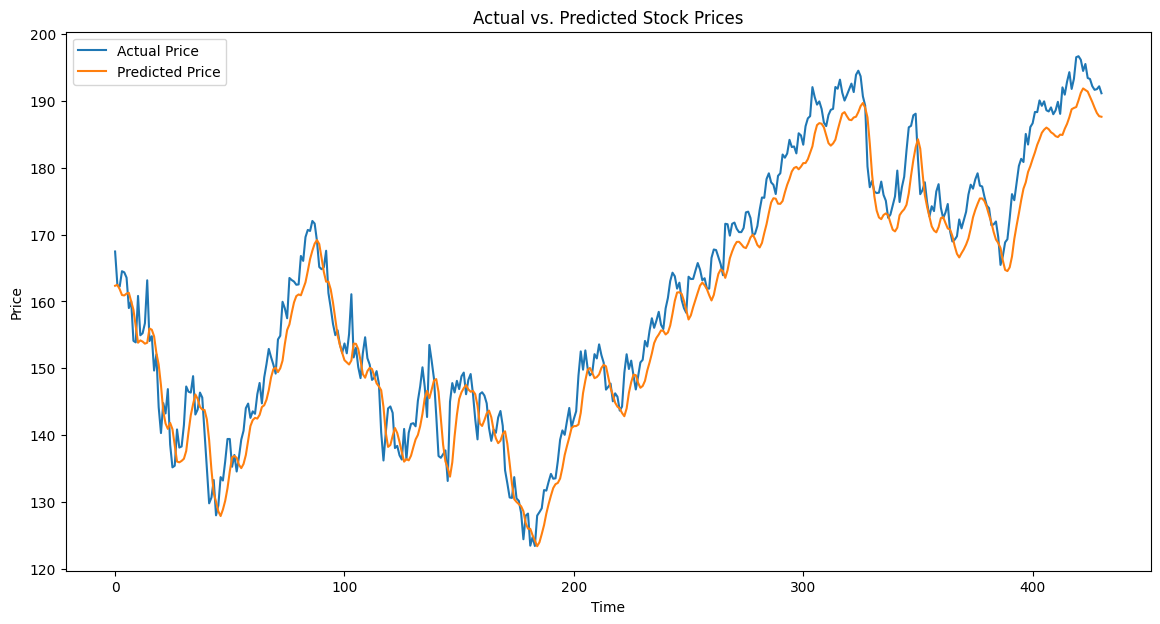

In [44]:
# 2. Visualize Predictions vs. Actuals - Plotting the predicted and actual stock prices helps in visual assessment

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(actuals, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


### Insights:
- **Error Analysis**: Examine periods where the model's predictions significantly deviate from actual prices to identify potential causes (e.g., market volatility, news events).
- **Feature Importance**: Analyze which features contribute most to the model's predictions. While LSTM models are less interpretable, techniques like SHAP values can be explored for interpretability.
- **Model Limitations**: Recognize that stock prices are influenced by numerous unpredictable factors. The model's predictions should be used as one of many tools in decision-making.

## Model Deployment

Develop a Streamlit application to serve your trained LSTM model.

In [49]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [45]:
torch.save(model.state_dict(), "model.pt")

In [ ]:
# check the key and values of the model for building project using streamlit while passing the parameters
checkpoint = torch.load('model.pt')
print(type(checkpoint))

<class 'collections.OrderedDict'>


In [47]:
# It prints: <class 'collections.OrderedDict'>
for key, value in checkpoint.items():
    print(key, value.shape)


lstm.weight_ih_l0 torch.Size([200, 1])
lstm.weight_hh_l0 torch.Size([200, 50])
lstm.bias_ih_l0 torch.Size([200])
lstm.bias_hh_l0 torch.Size([200])
lstm.weight_ih_l1 torch.Size([200, 50])
lstm.weight_hh_l1 torch.Size([200, 50])
lstm.bias_ih_l1 torch.Size([200])
lstm.bias_hh_l1 torch.Size([200])
fc.weight torch.Size([1, 50])
fc.bias torch.Size([1])
